In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [2]:
df=pd.read_excel('Contraceptive_method_dataset.xlsx')

In [3]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [6]:
df.shape

(1473, 10)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [8]:
dups= df.duplicated()
print('Number of duplicated rows =%d'% (dups.sum()))

Number of duplicated rows =80


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
dups= df.duplicated()
print('Number of duplicated rows =%d'% (dups.sum()))

Number of duplicated rows =0


In [11]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




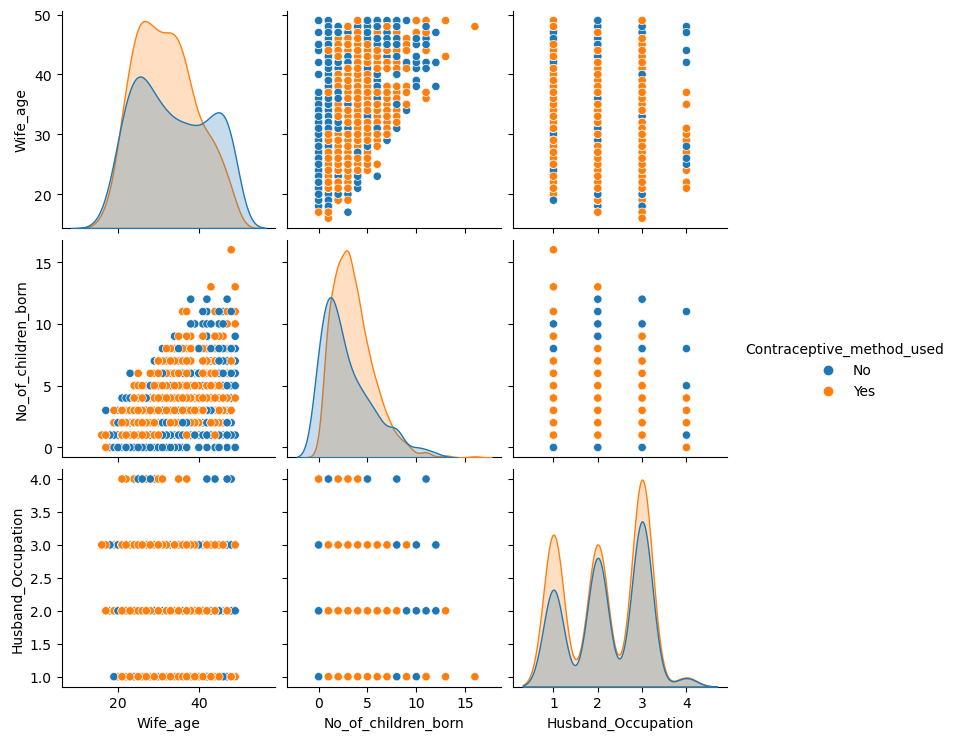

In [12]:
sns.pairplot(data=df, hue='Contraceptive_method_used')

In [13]:
df['Wife_ education'].value_counts()

Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64

In [14]:
education_mapping = {
    'Tertiary': 4,
    'Secondary': 3,
    'Primary': 2,
    'Uneducated': 1
}

df['Wife_ education'] = df['Wife_ education'].map(education_mapping)


In [15]:
df['Wife_ education'].value_counts()

4    515
3    398
2    330
1    150
Name: Wife_ education, dtype: int64

In [16]:
df['Husband_education'].value_counts()

Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64

In [17]:
education_mapping1 = {
    'Tertiary': 4,
    'Secondary': 3,
    'Primary': 2,
    'Uneducated': 1
}

df['Husband_education'] = df['Husband_education'].map(education_mapping1)


In [18]:
df['Husband_education'].value_counts()

4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64

In [19]:
df['Standard_of_living_index'].unique()

array(['High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [20]:
df['Standard_of_living_index'].value_counts()

Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [21]:
living_index_mapping1 = {
    'Very High': 4,
    'High': 3,
    'Low': 2,
    'Very Low': 1
}

df['Standard_of_living_index'] = df['Standard_of_living_index'].map(living_index_mapping1)


In [22]:
df['Standard_of_living_index'].value_counts()

4    618
3    419
2    227
1    129
Name: Standard_of_living_index, dtype: int64

In [23]:
df['Media_exposure '].value_counts()

Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64

In [24]:
Media_exposure_mapping = {
    'Not-Exposed': 2,
    'Exposed': 1
}

df['Media_exposure '] = df['Media_exposure '].map(Media_exposure_mapping)


In [25]:
df['Media_exposure '].value_counts()

1    1284
2     109
Name: Media_exposure , dtype: int64

In [26]:
df['Wife_religion'].value_counts()

Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64

In [27]:
Wife_religion_mapping = {
    'Non-Scientology': 2,
    'Scientology': 1
}

df['Wife_religion'] = df['Wife_religion'].map(Wife_religion_mapping)


In [28]:
df['Wife_religion'].value_counts()

1    1186
2     207
Name: Wife_religion, dtype: int64

In [29]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [30]:
df['Wife_Working'].value_counts()

No     1043
Yes     350
Name: Wife_Working, dtype: int64

In [31]:
Wife_Working_mapping = {
    'No': 2,
    'Yes': 1
}

df['Wife_Working'] = df['Wife_Working'].map(Wife_Working_mapping)


In [32]:
df['Wife_Working'].value_counts()

2    1043
1     350
Name: Wife_Working, dtype: int64

In [33]:
df['Contraceptive_method_used'].value_counts()

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

In [34]:
Contraceptive_method_used_mapping = {
    'No': 0,
    'Yes': 1
}

df['Contraceptive_method_used'] = df['Contraceptive_method_used'].map(Contraceptive_method_used_mapping)


In [35]:
df['Contraceptive_method_used'].value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

In [36]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,2,2,3,1,0
1,45.0,1,3,10.0,1,2,3,4,1,0
2,43.0,2,3,7.0,1,2,3,4,1,0
3,42.0,3,2,9.0,1,2,3,3,1,0
4,36.0,3,3,8.0,1,2,3,2,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1326 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1372 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 152.0 KB


In [38]:
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [39]:
df['Wife_age'].mean()

32.55731523378582

In [40]:
df['Wife_age'].median()

32.0

In [41]:
median_age = df['Wife_age'].median()
df['Wife_age'] = df['Wife_age'].fillna(median_age).astype(int)

In [42]:
df['No_of_children_born'].mean()

3.2908163265306123

In [43]:
df['No_of_children_born'].median()

3.0

In [44]:
median_children_born = df['No_of_children_born'].median()
df['No_of_children_born'] = df['No_of_children_born'].fillna(median_children_born).astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Wife_age                   1393 non-null   int32
 1   Wife_ education            1393 non-null   int64
 2   Husband_education          1393 non-null   int64
 3   No_of_children_born        1393 non-null   int32
 4   Wife_religion              1393 non-null   int64
 5   Wife_Working               1393 non-null   int64
 6   Husband_Occupation         1393 non-null   int64
 7   Standard_of_living_index   1393 non-null   int64
 8   Media_exposure             1393 non-null   int64
 9   Contraceptive_method_used  1393 non-null   int64
dtypes: int32(2), int64(8)
memory usage: 141.1 KB


In [46]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1393.0,32.530510,8.088188,16.0,26.0,32.0,38.0,49.0
Wife_ education,1393.0,2.917444,1.015507,1.0,2.0,3.0,4.0,4.0
Husband_education,1393.0,3.404882,0.825965,1.0,3.0,4.0,4.0,4.0
No_of_children_born,1393.0,3.286432,2.381791,0.0,1.0,3.0,5.0,16.0
Wife_religion,1393.0,1.148600,0.355822,1.0,1.0,1.0,1.0,2.0
Wife_Working,1393.0,1.748744,0.433891,1.0,1.0,2.0,2.0,2.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1393.0,3.095477,0.984179,1.0,2.0,3.0,4.0,4.0
Media_exposure,1393.0,1.078248,0.268658,1.0,1.0,1.0,1.0,2.0
Contraceptive_method_used,1393.0,0.559225,0.496658,0.0,0.0,1.0,1.0,1.0


In [48]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [49]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,2,2,3,1,0
1,45,1,3,10,1,2,3,4,1,0
2,43,2,3,7,1,2,3,4,1,0
3,42,3,2,9,1,2,3,3,1,0
4,36,3,3,8,1,2,3,2,1,0


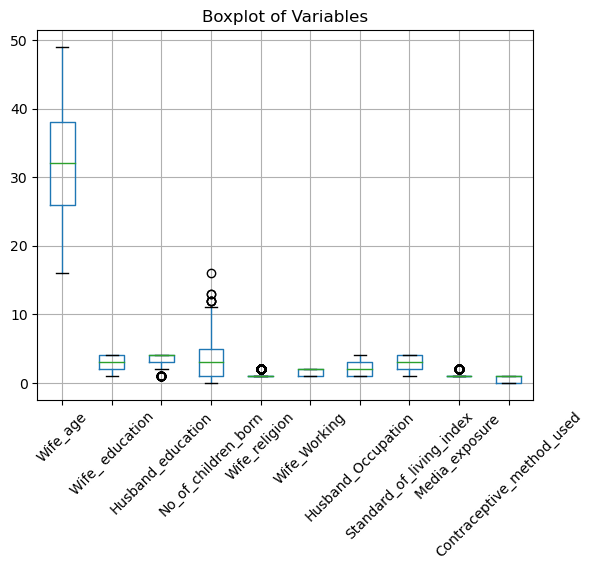

In [50]:
df.boxplot()

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add a title to the plot
plt.title('Boxplot of Variables')

# Show the plot
plt.show()


In [51]:
df[~df.applymap(np.isreal).all(1)]

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used


<AxesSubplot:xlabel='No_of_children_born'>

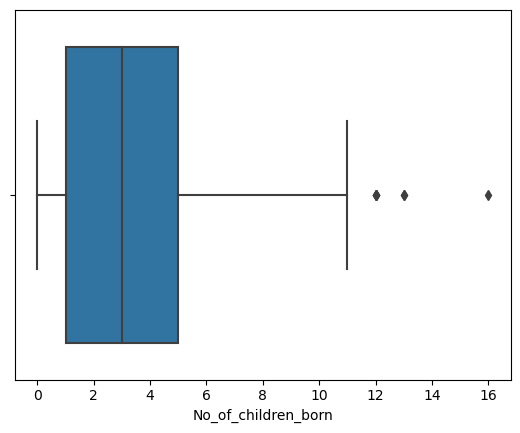

In [52]:
sns.boxplot(data=df, x='No_of_children_born')

<AxesSubplot:xlabel='No_of_children_born', ylabel='Count'>

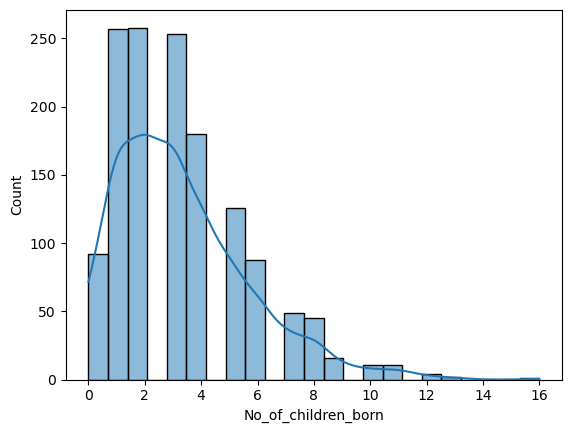

In [53]:
sns.histplot(data=df, x='No_of_children_born', kde=True)

<AxesSubplot:xlabel='Wife_age'>

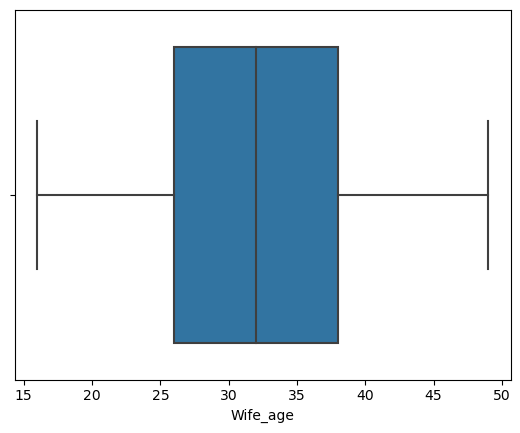

In [54]:
sns.boxplot(data=df, x='Wife_age')

<AxesSubplot:xlabel='Wife_age', ylabel='Count'>

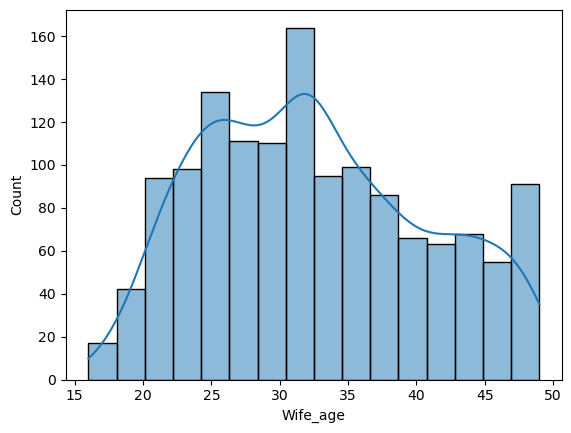

In [55]:
sns.histplot(data=df, x='Wife_age', kde=True)

<AxesSubplot:xlabel='Wife_ education', ylabel='count'>

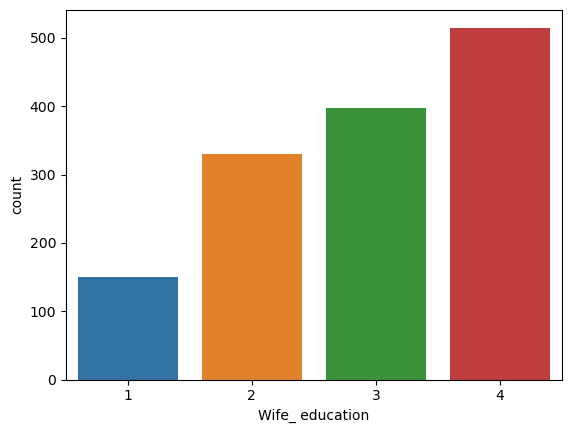

In [56]:
sns.countplot(data=df, x='Wife_ education')

<AxesSubplot:xlabel='Husband_education', ylabel='count'>

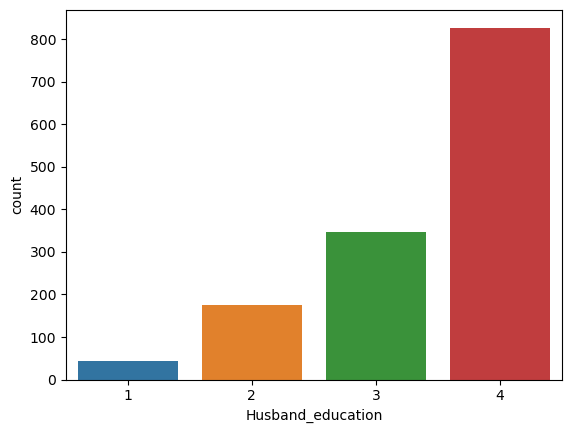

In [57]:
sns.countplot(data=df, x='Husband_education')

In [58]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

<AxesSubplot:xlabel='Wife_religion', ylabel='count'>

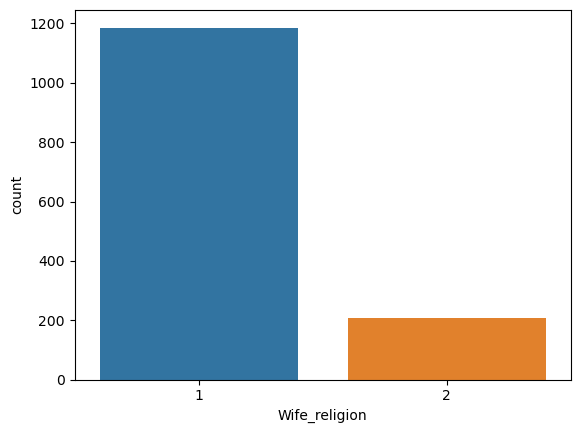

In [59]:
sns.countplot(data=df, x='Wife_religion')

In [60]:
df['Wife_religion'].value_counts()

1    1186
2     207
Name: Wife_religion, dtype: int64

<AxesSubplot:xlabel='Wife_Working', ylabel='count'>

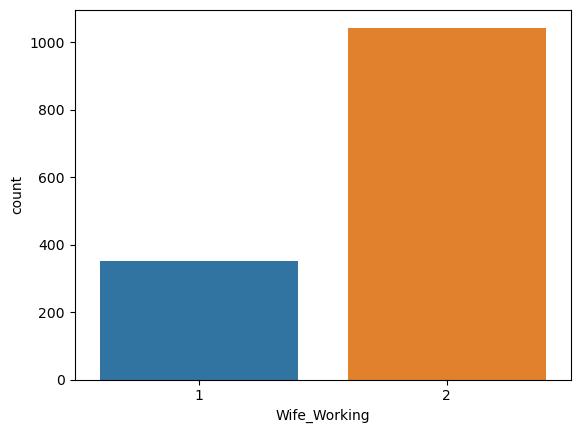

In [61]:
sns.countplot(data=df, x='Wife_Working')

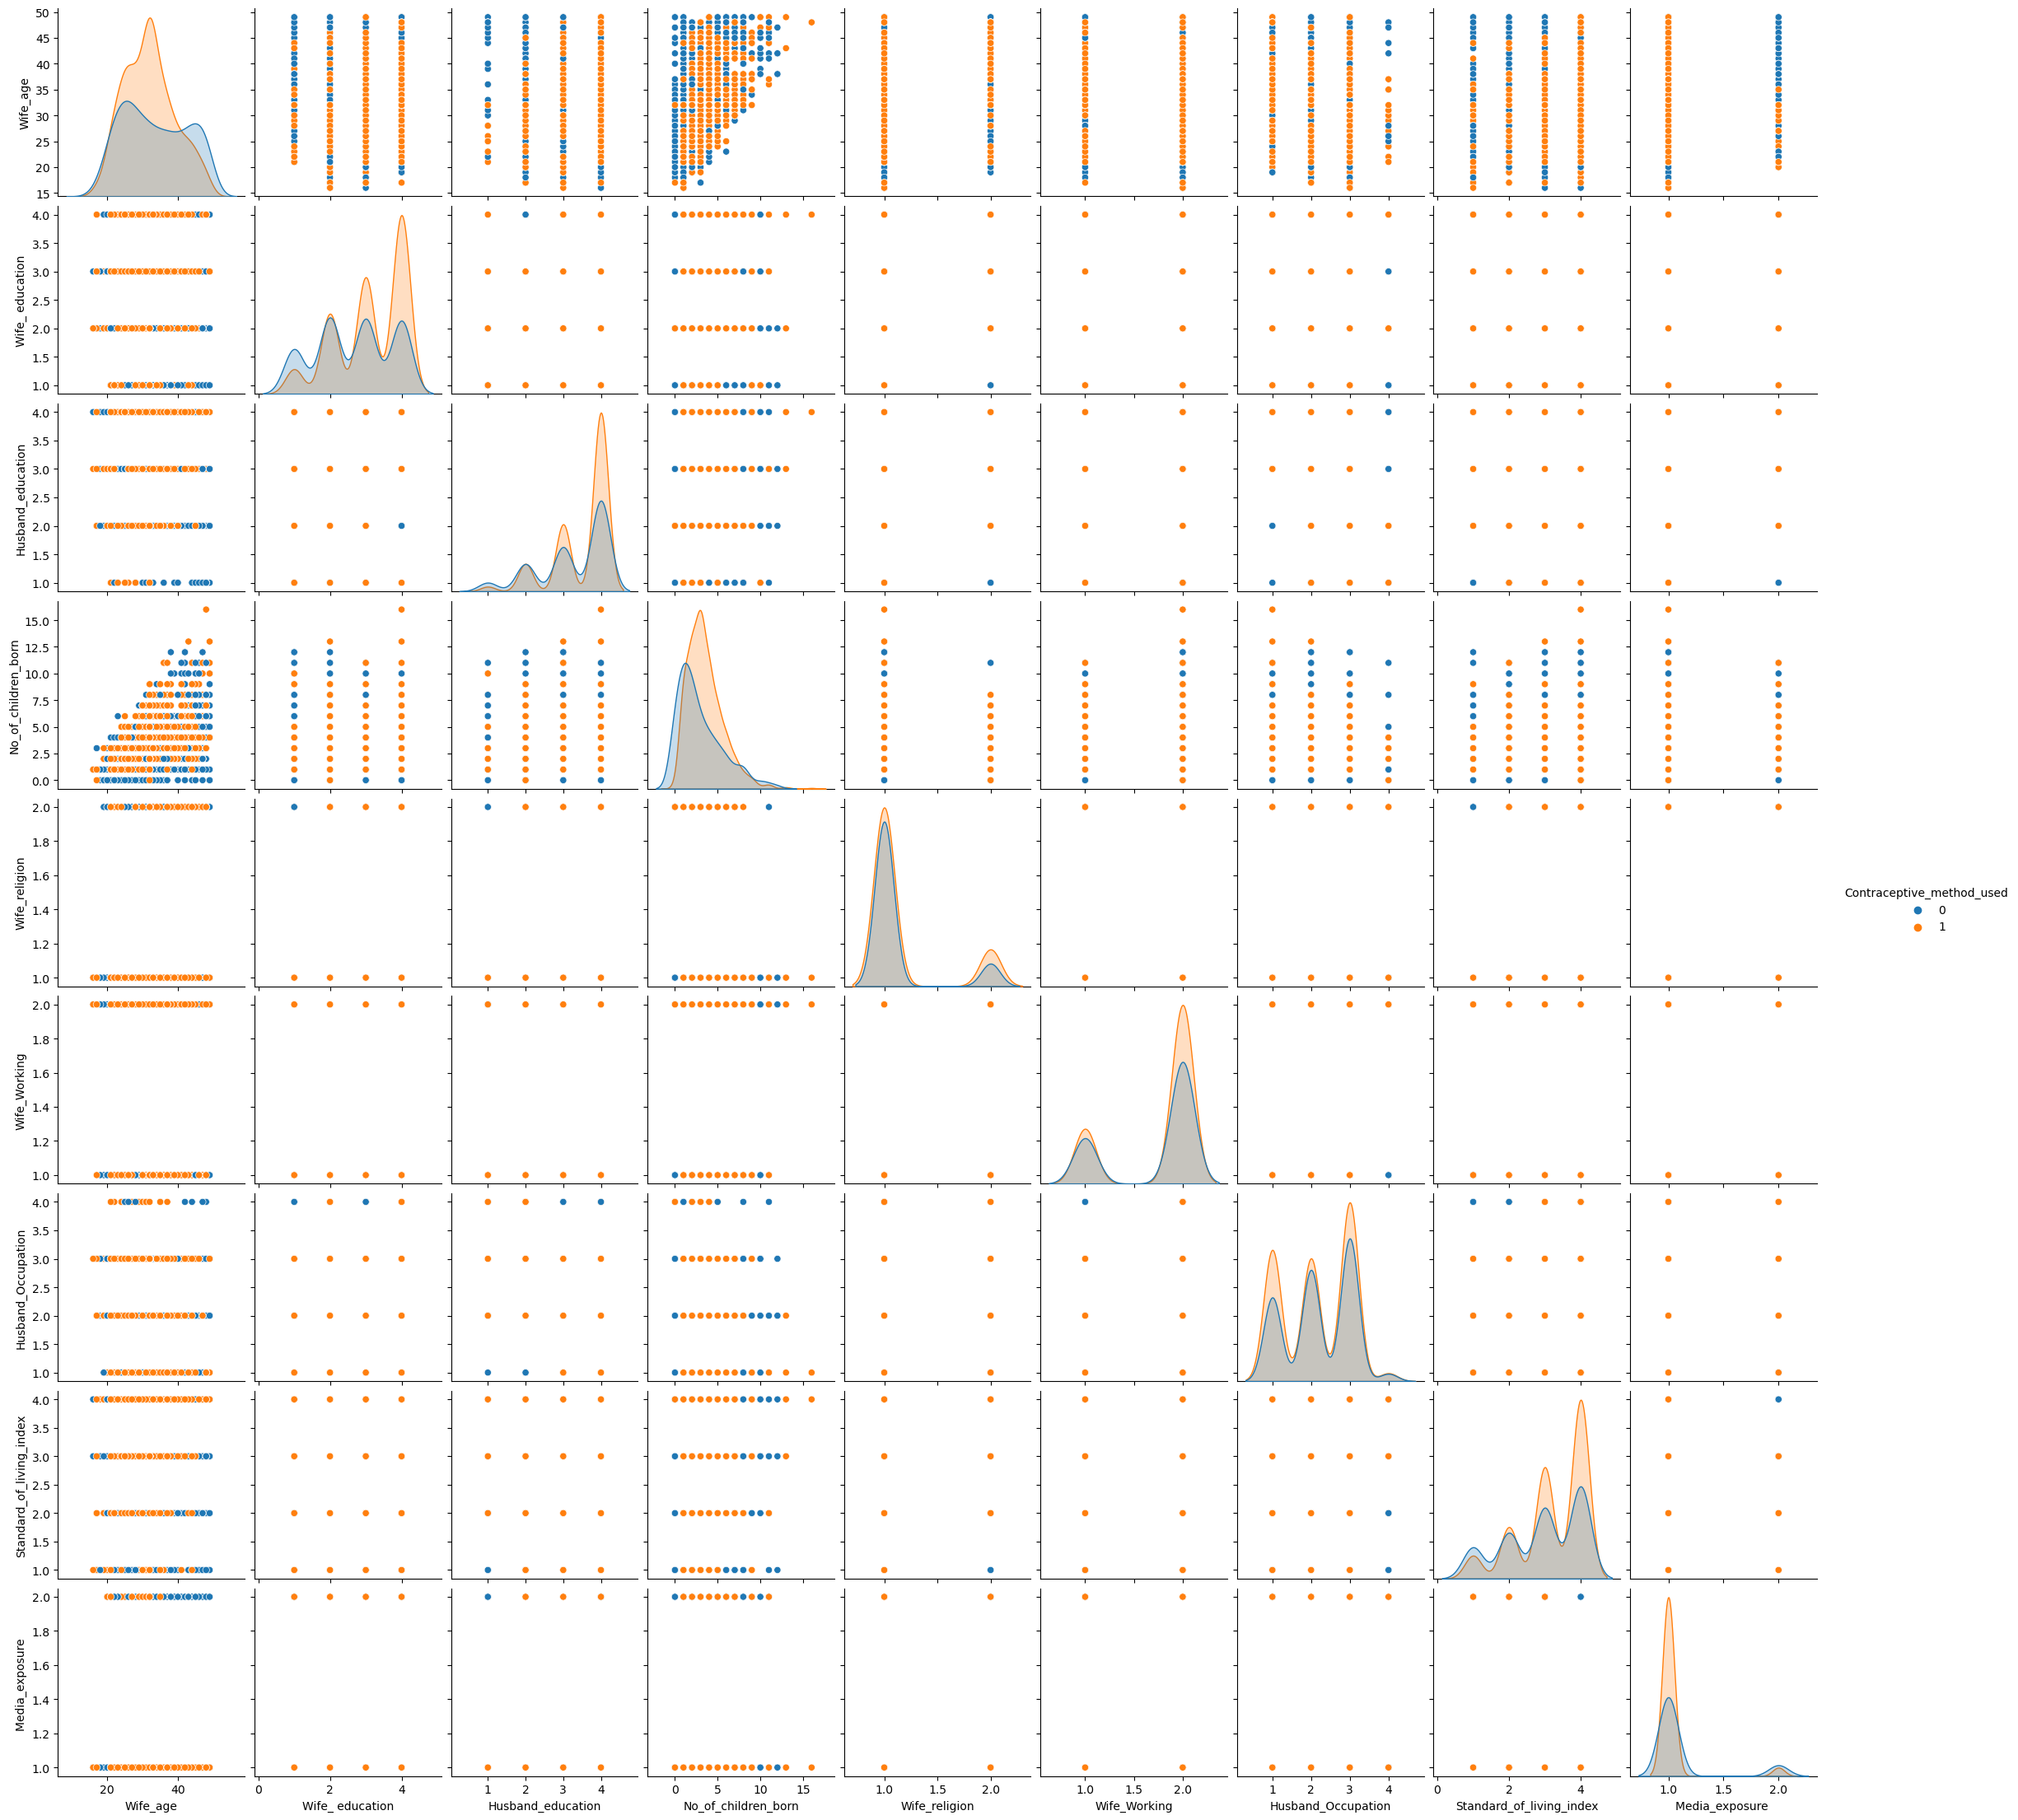

In [62]:
sns.pairplot(data=df , hue='Contraceptive_method_used' , diag_kind = 'kde')

<AxesSubplot:>

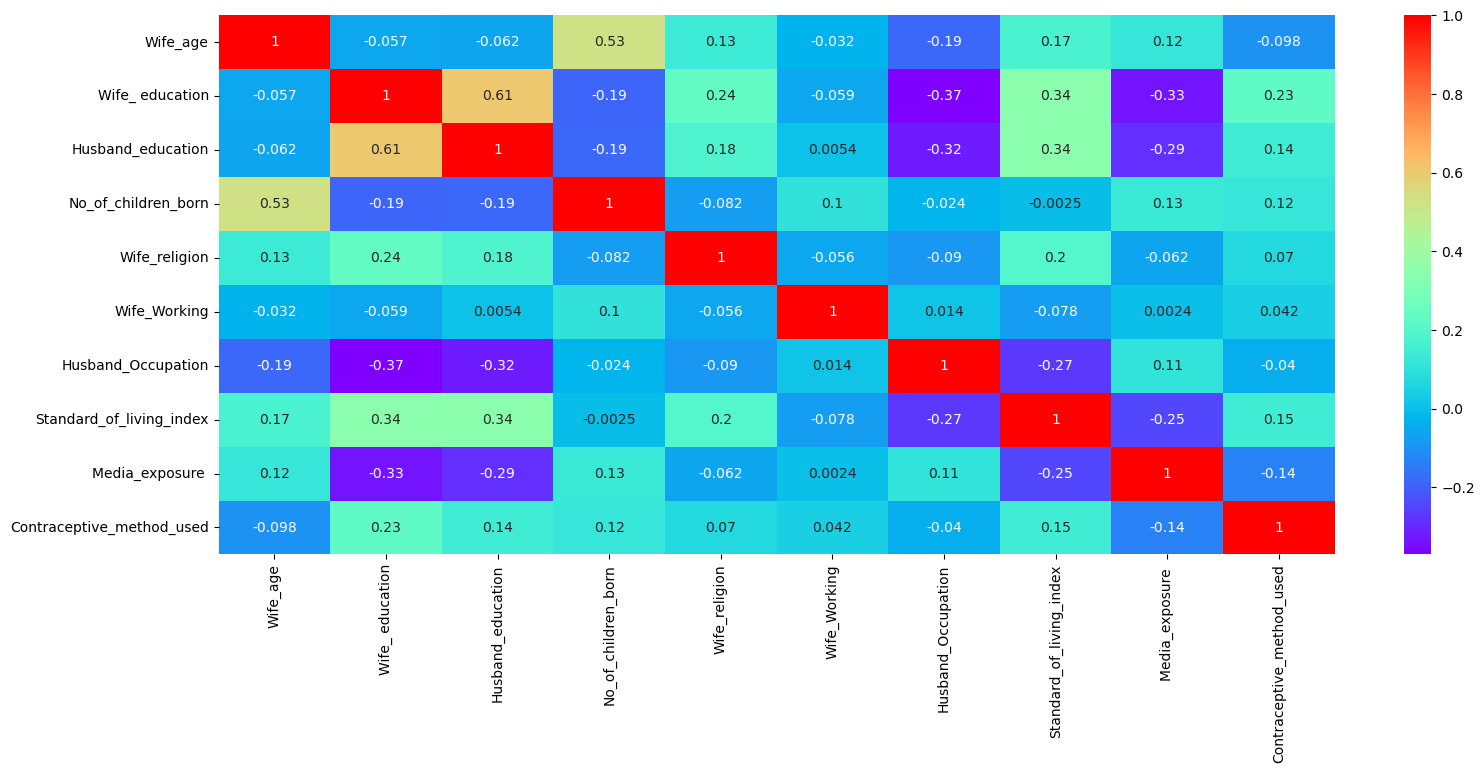

In [63]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='rainbow')

<AxesSubplot:xlabel='Wife_age', ylabel='count'>

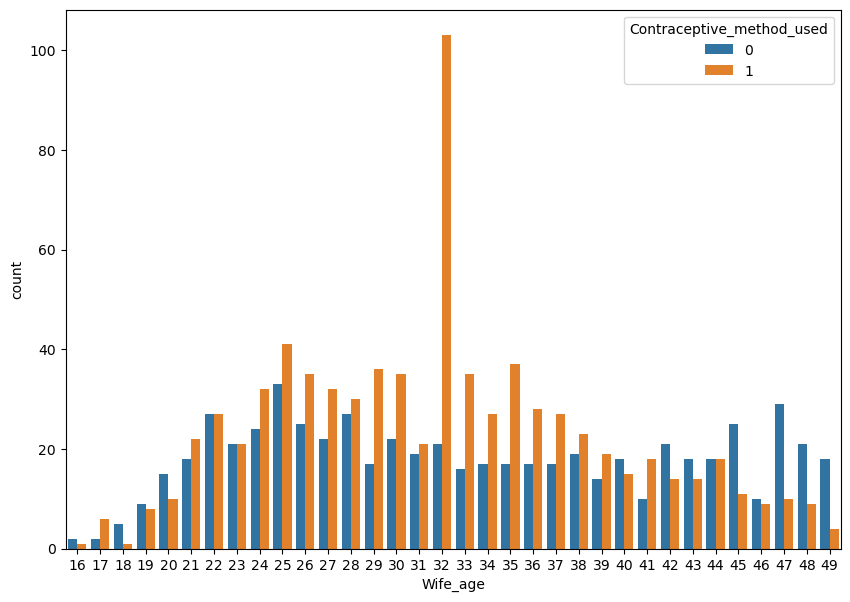

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Wife_age', hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Wife_ education', ylabel='count'>

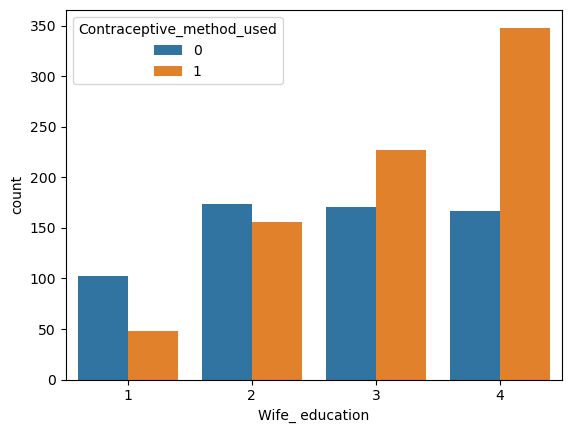

In [65]:
sns.countplot(data=df, x='Wife_ education', hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Husband_education', ylabel='count'>

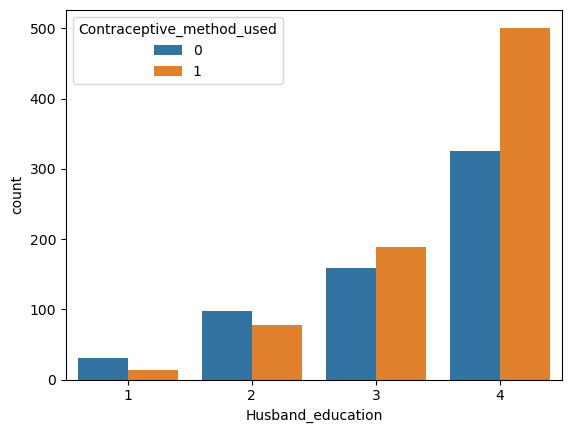

In [66]:
sns.countplot(data=df, x='Husband_education', hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

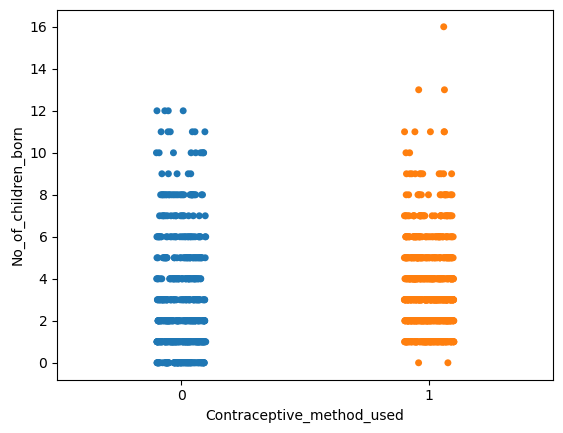

In [67]:
sns.stripplot(x='Contraceptive_method_used', y='No_of_children_born', data=df)

<AxesSubplot:xlabel='Wife_Working', ylabel='count'>

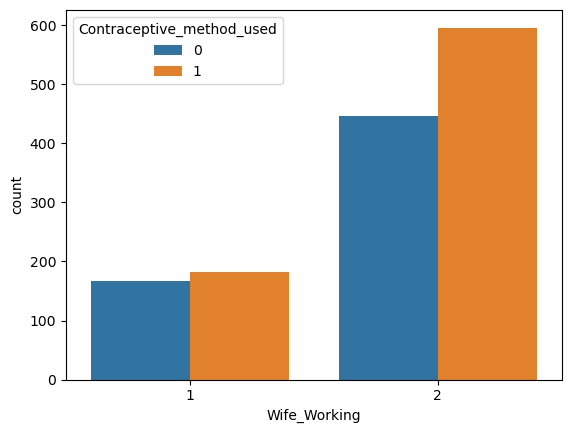

In [68]:
sns.countplot(data=df, x='Wife_Working', hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Wife_religion', ylabel='count'>

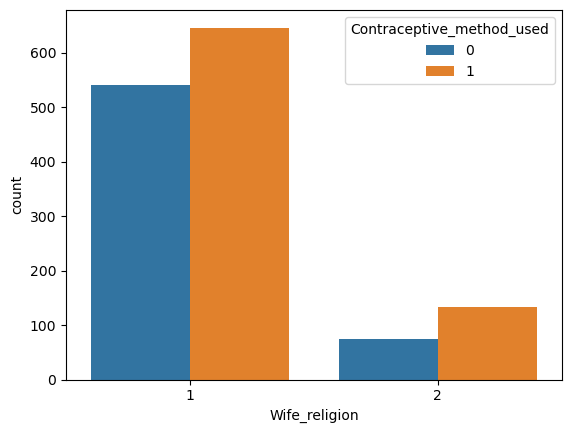

In [69]:
sns.countplot(data=df, x='Wife_religion', hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Standard_of_living_index', ylabel='count'>

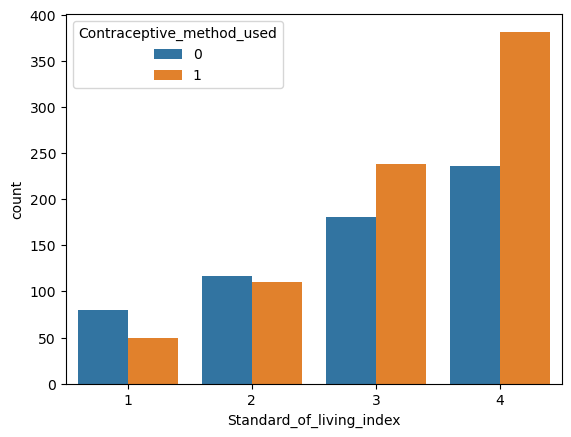

In [70]:
sns.countplot(data=df, x='Standard_of_living_index', hue='Contraceptive_method_used')

<AxesSubplot:xlabel='Media_exposure ', ylabel='count'>

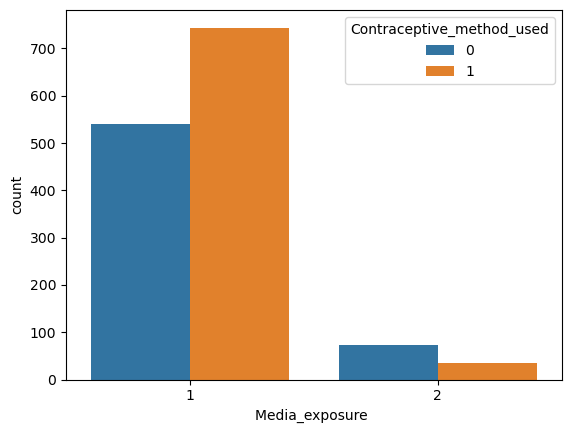

In [71]:
sns.countplot(data=df, x='Media_exposure ', hue='Contraceptive_method_used')

In [72]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [74]:
X=df.drop('Contraceptive_method_used',axis=1)
y=df[['Contraceptive_method_used']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=2, stratify=df['Contraceptive_method_used'])

In [76]:
y_train.value_counts(normalize=True)

Contraceptive_method_used
1                            0.558974
0                            0.441026
dtype: float64

In [77]:
model = LogisticRegression(solver='newton-cg', max_iter=10000, penalty='none', verbose=True,n_jobs=2)

In [78]:
model.fit(X_train, y_train)

C:\Users\souradip\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [79]:
y_predict = model.predict(X_train)
print(y_predict)

[1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 1 1 1 1 

In [80]:
y_predict1 = model.predict(X_test)
print(y_predict1)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 0 0 1 1 0 0 1 1 0]


In [81]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [82]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.380982,0.619018
1,0.351590,0.648410
2,0.298429,0.701571
3,0.570795,0.429205
4,0.495381,0.504619


In [83]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.316618,0.683382
1,0.319686,0.680314
2,0.079646,0.920354
3,0.201060,0.798940
4,0.396030,0.603970


In [84]:
model.score(X_train,y_train)

0.6574358974358975

In [85]:
model.score(X_test,y_test)

0.6602870813397129

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

AUC: 0.710


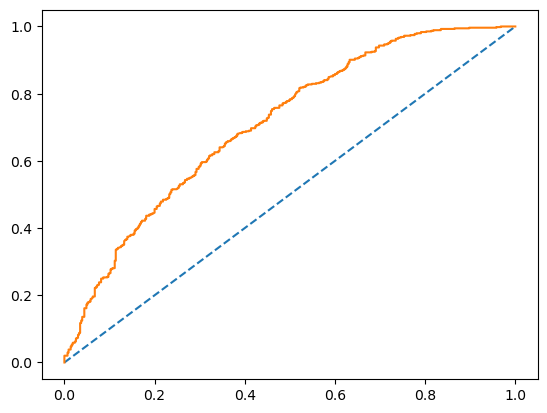

In [87]:
probs = model.predict_proba(X_train)
probs = probs[:,1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.675


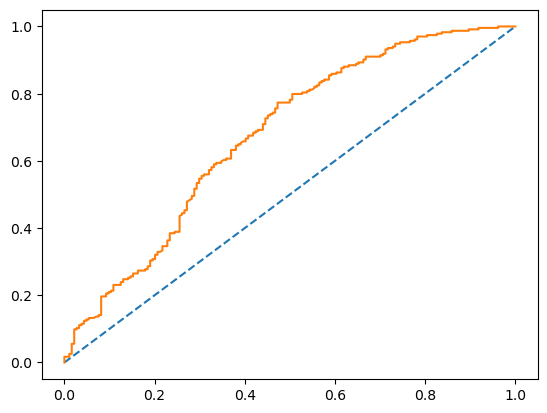

In [88]:
probs = model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_train,ytrain_predict)

array([[217, 213],
       [121, 424]], dtype=int64)

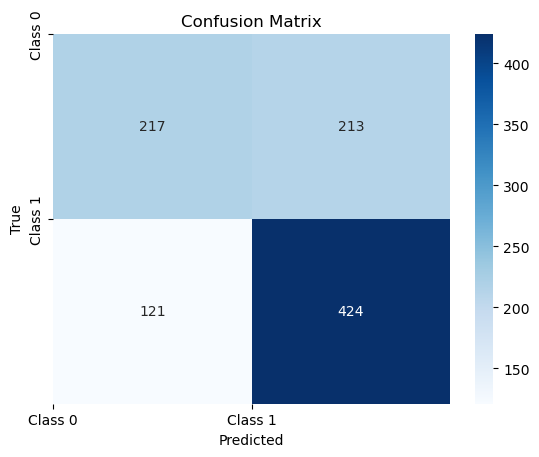

In [91]:
cm = confusion_matrix(y_train, ytrain_predict)

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Display the plot
plt.show()

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.64      0.50      0.57       430
           1       0.67      0.78      0.72       545

    accuracy                           0.66       975
   macro avg       0.65      0.64      0.64       975
weighted avg       0.66      0.66      0.65       975



In [94]:
confusion_matrix(y_test,ytest_predict)

array([[ 89,  95],
       [ 47, 187]], dtype=int64)

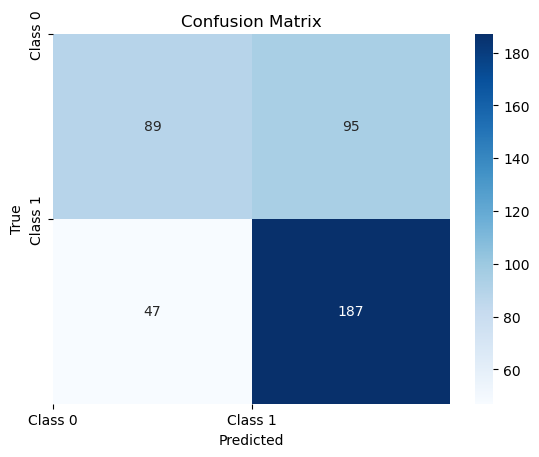

In [95]:
cm = confusion_matrix(y_test, ytest_predict)

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Display the plot
plt.show()

In [96]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.48      0.56       184
           1       0.66      0.80      0.72       234

    accuracy                           0.66       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.66      0.65       418



# With GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
grid={'penalty':['12','none'],
     'solver':['sag','lbfgs'],
     'tol':[0.0001,0.00001]}

In [99]:
model= LogisticRegression(max_iter=10000,n_jobs=2)

In [100]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1,scoring='f1')

In [101]:
grid_search.fit(X_train, y_train)

C:\Users\souradip\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\souradip\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\souradip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\souradip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise Valu

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['12', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [103]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [104]:
best_model = grid_search.best_estimator_

In [105]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [106]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.317917,0.682083
1,0.321054,0.678946
2,0.079883,0.920117
3,0.201772,0.798228
4,0.397686,0.602314


In [107]:
confusion_matrix(y_train, ytrain_predict)

array([[216, 214],
       [121, 424]], dtype=int64)

In [108]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       430
           1       0.66      0.78      0.72       545

    accuracy                           0.66       975
   macro avg       0.65      0.64      0.64       975
weighted avg       0.65      0.66      0.65       975



In [109]:
confusion_matrix(y_test, ytest_predict)

array([[ 90,  94],
       [ 47, 187]], dtype=int64)

In [110]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56       184
           1       0.67      0.80      0.73       234

    accuracy                           0.66       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.66      0.65       418



In [111]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()

In [112]:
tn, fp, fn, tp

(90, 94, 47, 187)

In [113]:
accuracy= (tn+tp)/(tn+fp+fn+tp)
print(accuracy)

0.6626794258373205


In [114]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_train, ytrain_predict).ravel()

In [115]:
tn1, fp1, fn1, tp1

(216, 214, 121, 424)

In [116]:
accuracy1= (tn1+tp1)/(tn1+fp1+fn1+tp1)
print(accuracy1)

0.6564102564102564


# With LDA


In [122]:
import os 
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [118]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [119]:
scaler=StandardScaler()
x = scaler.fit_transform(df.drop(['Contraceptive_method_used'],axis=1))
Y = df['Contraceptive_method_used']

In [120]:
Y.value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

In [125]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.30, random_state=1, stratify = Y)

In [126]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,Y_train)

In [127]:
pred_class_train = model.predict(x_train)
pred_class_test = model.predict(x_test)

Text(0.5, 1.0, 'Test Data')

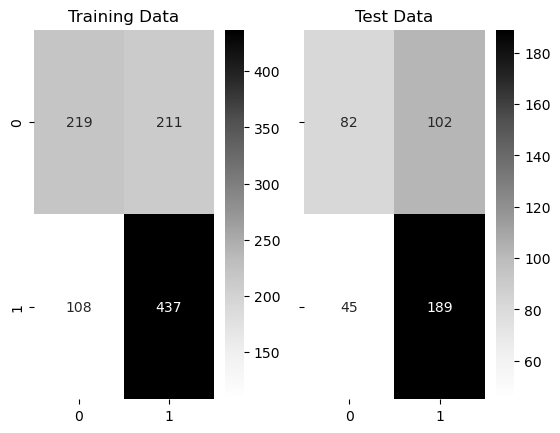

In [129]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);a[0][1].set_title('Test Data')

In [130]:
print('classification report of training data:\n\n', metrics.classification_report(Y_train,pred_class_train),'\n')
print('classification report of test data:\n\n', metrics.classification_report(Y_test,pred_class_test),'\n')

classification report of training data:

               precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.80      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.66       975
 

classification report of test data:

               precision    recall  f1-score   support

           0       0.65      0.45      0.53       184
           1       0.65      0.81      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.62       418
weighted avg       0.65      0.65      0.64       418
 



In [131]:
pred_prob_train = model.predict_proba(x_train)

pred_prob_test = model.predict_proba(x_test)

AUC for the Traning Data: 0.719


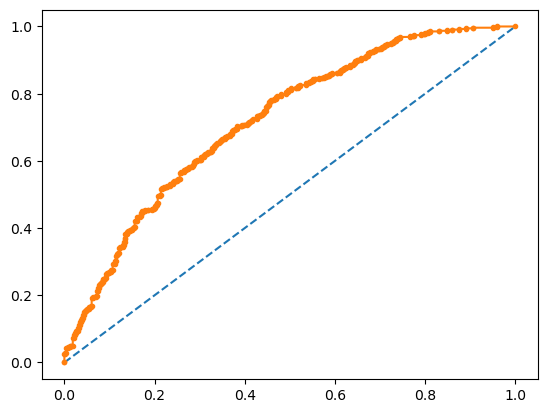

In [133]:
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Traning Data: %.3f' %auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = 'Traning Data')

AUC for the Traning Data: 0.664


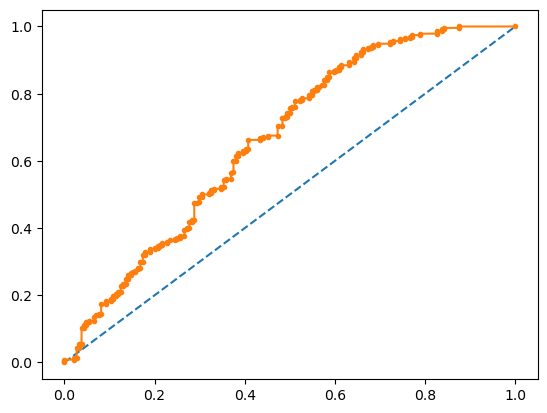

In [134]:
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Traning Data: %.3f' %auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.', label = 'Test Data')

In [135]:
clf.intercept_

array([0.29091934])

In [136]:
clf.coef_

array([[-0.59179189,  0.52315047,  0.02985055,  0.73958093,  0.16005024,
         0.07410451,  0.11734836,  0.31440571, -0.0920293 ]])

In [138]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [139]:
a=clf.coef_
np.round(a,2)

array([[-0.59,  0.52,  0.03,  0.74,  0.16,  0.07,  0.12,  0.31, -0.09]])

# CART

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
X_train.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
938,28,3,3,3,1,1,2,4,1
657,28,4,4,1,1,2,3,2,1
1422,32,2,3,6,1,2,3,4,1
946,25,2,2,1,1,2,3,3,1
246,34,4,4,2,1,1,1,3,1


In [144]:
y_train.head()

,Contraceptive_method_used
938,1
657,1
1422,1
946,1
246,0


In [146]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(975, 9)
(975, 1)
(418, 9)
(418, 1)


In [147]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=1)

In [148]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [149]:
from sklearn import tree

In [150]:
train_char_label = ['No','Yes']

In [154]:
Contraceptive_Tree_File = open(r'C:\Users\souradip\Contraceptive_Tree.dot', 'w')

In [155]:
dot_data = tree.export_graphviz(dt_model, out_file= Contraceptive_Tree_File , feature_names = list(X_train), class_names = list(train_char_label))

In [156]:
Contraceptive_Tree_File.close()

In [158]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.391566
No_of_children_born       0.202849
Wife_ education           0.086672
Standard_of_living_index  0.086631
Husband_education         0.063957
Husband_Occupation        0.062836
Wife_Working              0.053269
Wife_religion             0.028906
Media_exposure            0.023314


In [159]:
y_predict = dt_model.predict(X_test)

In [160]:
y_predict.shape

(418,)

In [164]:
reg_df_model = DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf=10, min_samples_split=30)

In [165]:
reg_df_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [167]:
Contraceptive_new_Tree_File = open(r'C:\Users\souradip\Contraceptive_new_Tree.dot', 'w')
dot_data = tree.export_graphviz(reg_df_model, out_file= Contraceptive_new_Tree_File , feature_names = list(X_train), class_names = list(train_char_label))

Contraceptive_new_Tree_File.close()

In [168]:
ytrain_predict = reg_df_model.predict(X_train)
ytest_predict = reg_df_model.predict(X_test)

In [170]:
print(reg_df_model.predict(X_train))

[1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 1 0 1 1 

In [171]:
print(reg_df_model.predict(X_test))

[1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 1 1 1]


In [194]:
ytest_predict_prob = reg_df_model.predict_proba(X_test)
ytest_predict_prob

array([[0.14285714, 0.85714286],
       [0.32142857, 0.67857143],
       [0.13333333, 0.86666667],
       [0.10416667, 0.89583333],
       [0.9       , 0.1       ],
       [0.61904762, 0.38095238],
       [0.10416667, 0.89583333],
       [0.44444444, 0.55555556],
       [0.32142857, 0.67857143],
       [0.0212766 , 0.9787234 ],
       [0.6969697 , 0.3030303 ],
       [0.36      , 0.64      ],
       [0.0212766 , 0.9787234 ],
       [1.        , 0.        ],
       [0.32142857, 0.67857143],
       [0.6969697 , 0.3030303 ],
       [0.32142857, 0.67857143],
       [0.3125    , 0.6875    ],
       [0.41860465, 0.58139535],
       [0.9       , 0.1       ],
       [0.10416667, 0.89583333],
       [0.14285714, 0.85714286],
       [0.22727273, 0.77272727],
       [0.70833333, 0.29166667],
       [0.35      , 0.65      ],
       [0.55      , 0.45      ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.4137931 , 0.5862069 ],
       [0.

In [195]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.142857,0.857143
1,0.321429,0.678571
2,0.133333,0.866667
3,0.104167,0.895833
4,0.900000,0.100000


AUC: 0.834


<function matplotlib.pyplot.show(close=None, block=None)>

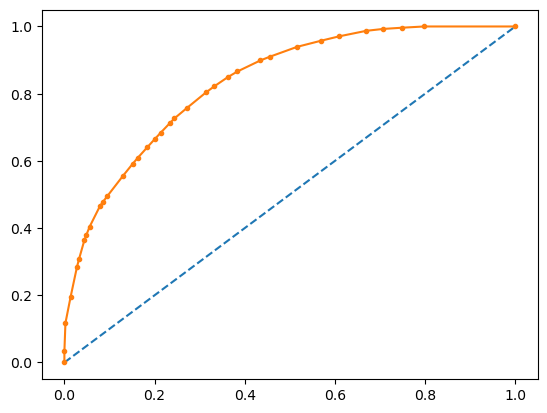

In [206]:
from sklearn.metrics import roc_auc_score, roc_curve
probs = reg_df_model.predict_proba(X_train)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show


In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [198]:
confusion_matrix(y_train,ytrain_predict)

array([[274, 156],
       [ 82, 463]], dtype=int64)

In [199]:
reg_df_model.score(X_train,y_train)

0.7558974358974359

In [200]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       430
           1       0.75      0.85      0.80       545

    accuracy                           0.76       975
   macro avg       0.76      0.74      0.75       975
weighted avg       0.76      0.76      0.75       975



AUC: 0.719


<function matplotlib.pyplot.show(close=None, block=None)>

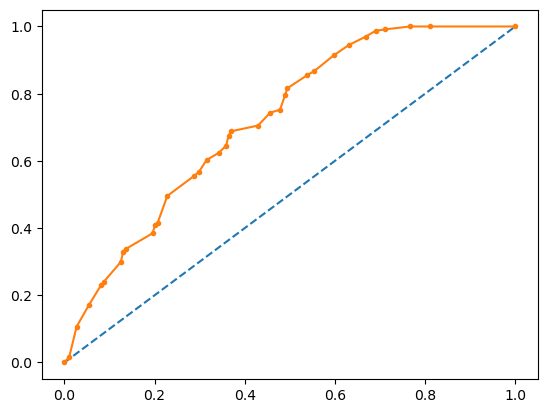

In [205]:
probs = reg_df_model.predict_proba(X_test)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show

In [202]:
confusion_matrix(y_test,ytest_predict)

array([[ 94,  90],
       [ 48, 186]], dtype=int64)

In [203]:
reg_df_model.score(X_test,y_test)

0.6698564593301436

In [204]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58       184
           1       0.67      0.79      0.73       234

    accuracy                           0.67       418
   macro avg       0.67      0.65      0.65       418
weighted avg       0.67      0.67      0.66       418



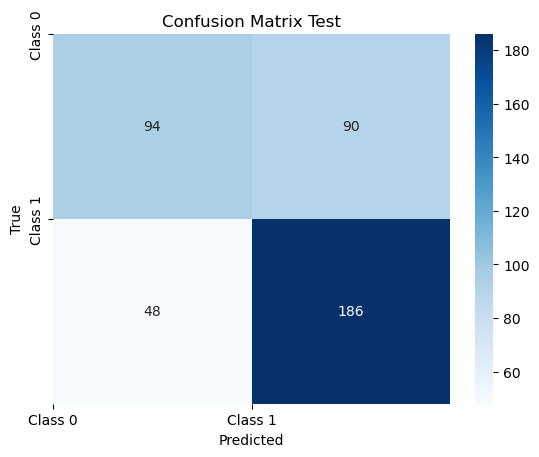

In [211]:
cm = confusion_matrix(y_test, ytest_predict)

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Test')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Display the plot
plt.show()

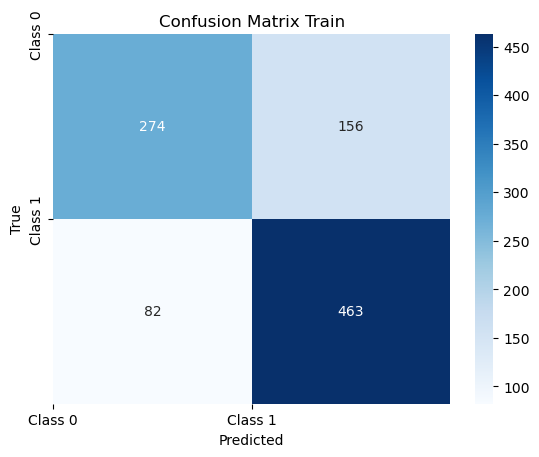

In [210]:
cm = confusion_matrix(y_train, ytrain_predict)

# Create a heatmap plot of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Train')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])

# Display the plot
plt.show()